In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from datetime import datetime

import matplotlib.pyplot as plt

In [362]:
img_dirs = ['/Volumes/Bastian/Hackathon/Data/timelapse_images_fast/timelapse_images_fast']

In [363]:
shape = (100, 100)
target_dir = './reshaped_images'
for d in img_dirs:
    for fil in d:
        image = imread(fil)
        image_resized = resize(image, shape, anti_aliasing=True)
        os.path.makedirs(os.path.join(target_dir, d[:-4] + '_resized.jpg'))
        imsave(os.path.join(target_dir, d, fil), image)

NameError: name 'imread' is not defined

In [364]:
year_path = [(2017, '/Volumes/Bastian/Hackathon/Data/timelapse_images_fast/timelapse_images_fast/')]

In [365]:
df = pd.DataFrame()
for y, _ in year_path:
    path = '../../perma_data/timeseries_derived_data_products/MH10_resistivity_rock_{}.csv'.format(y)
    df = pd.concat((df, pd.read_csv(path)), axis=0)

In [366]:
df2 = pd.DataFrame()
for y, _ in year_path:
    path2 = '../../perma_data/timeseries_derived_data_products/MH25_vaisalawxt520prec_{}.csv'.format(y)
    df2 = pd.concat((df2, pd.read_csv(path2)), axis=0)

In [367]:
df3 = pd.DataFrame()
for y, _ in year_path:
    path3 = '../../perma_data/timeseries_derived_data_products/MH25_vaisalawxt520windpth_2017.csv'.format(y)
    df3 = pd.concat((df3, pd.read_csv(path3)), axis=0)

In [368]:
df.head()

,time,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],resistivity_35_85cm [Mohm],resistivity_10_85cm [Mohm],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C]
0,2017-01-01T00:00:00Z,10.0,2141.0,17.5556,43.1962,27.3694,2.5515,42.3615,40.5800,26.6627,24.3027,11.2267,7.0847,1.9563,-9.7372,1.0055,1.9538,-9.7387
1,2017-01-01T01:00:00Z,10.0,2141.0,17.3518,44.6352,27.2334,2.5086,42.4960,40.8015,26.5007,24.4067,11.3451,7.0938,1.9559,-9.7373,1.0055,1.9531,-9.7389
2,2017-01-01T02:00:00Z,10.0,2141.0,17.8145,46.1186,27.1687,2.4633,44.3185,41.0928,26.1960,24.5976,11.4621,7.1170,1.9557,-9.7378,1.0055,1.9531,-9.7386
3,2017-01-01T03:00:00Z,10.0,2141.0,18.6398,47.0515,27.1117,2.4222,46.1445,41.3910,25.8954,24.9310,11.5221,7.2701,1.9558,-9.7377,1.0054,1.9528,-9.7393
4,2017-01-01T04:00:00Z,10.0,2141.0,20.0013,47.4553,27.0140,2.3888,48.2208,41.5645,25.5277,25.4654,11.5436,7.5488,1.9556,-9.7378,1.0054,1.9531,-9.7394


In [369]:
def interpolate_to_timestamps(df, time_stamps):
    df = df.resample('4T').interpolate()
    ind = [df.index.get_loc(tim, method='nearest') for tim in time_stamps.time]
    return df.iloc[ind, :]

In [384]:
def extract_time_stamps(year_path):
    """
    input: [(year, root_dir), ...]
    """
    dfs = pd.DataFrame()
    for y, root_dir in year_path:
        path_dict = {}
        for filename in glob.iglob(root_dir + '**/*/*', recursive=True):
            di, filname = os.path.split(filename)
            path_dict[filname] = extract_time(filname)
        df = pd.DataFrame({'time':list(path_dict.values()), 'filename': list(path_dict.keys())}, )
        dfs = pd.concat((dfs, df), axis=0)
    return dfs

In [385]:
def extract_time(filname):
    return datetime.strptime(filname, '%Y%m%d_%H%M%S.JPG')

In [386]:
def extract_summer_days(time_stamps):
    start = pd.Timestamp(datetime(year=2000, month=1, day=1, hour=8)).time()
    end = pd.Timestamp(datetime(year=2000, month=1, day=1, hour=20)).time()
    time_stamps_day = time_stamps[np.logical_and(time_stamps['time'].dt.time >= start , 
                                                 time_stamps['time'].dt.time <= end)]
    
    june = pd.Timestamp(datetime(year=2000, month=5, day=1, hour=8)).month
    august = pd.Timestamp(datetime(year=2000, month=8, day=1, hour=8)).month

    time_stamps_summerday = time_stamps_day[np.logical_and(time_stamps['time'].dt.month < august , 
                                                           time_stamps['time'].dt.month >= june)]
    
    return time_stamps_summerday


In [387]:
#time_stamps = pd.read_pickle('pd_time_stamps.pkl')
#time_stamps.head()
time_stamps = extract_time_stamps(year_path)
time_stamps.head()
summer_days = extract_summer_days(time_stamps)

/Users/jim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [388]:
#summer_days = pd.read_pickle('pd_time_stamps_summerdays.pkl')

In [389]:
df = df.set_index(pd.DatetimeIndex(df.loc[:, 'time']))
df_interp = interpolate_to_timestamps(df, summer_days)

In [390]:
df2 = df2.set_index(pd.DatetimeIndex(df2.loc[:, 'time']))
df2_interp = interpolate_to_timestamps(df2, summer_days)

In [391]:
df3 = df3.set_index(pd.DatetimeIndex(df3.loc[:, 'time']))
df3_interp = interpolate_to_timestamps(df3, summer_days)

In [395]:
df_interp = df_interp.loc[~df_interp.index.duplicated(keep='first')]
df2_interp = df2_interp.loc[~df2_interp.index.duplicated(keep='first')]
df3_interp = df3_interp.loc[~df3_interp.index.duplicated(keep='first')]

dataset = pd.concat((df_interp, df2_interp, df3_interp), axis=1)
dataset['path'] = time_stamps.filename
dataset = dataset.rename(columns={'rain_intensity [mm/h]': 'rain_intensity'})

In [394]:
#dataset.loc[:, 'resistivity_10cm [Mohm]'].hist(bins=500, figsize=(20, 10))
dataset.head()

,time,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],...,wind_direction_average [°],wind_direction_maximum [°],wind_speed_minimum [km/h],wind_speed_average [km/h],wind_speed_maximum [km/h],temp_air [°C],temp_internal [°C],relative_humidity [%RH],air_pressure [hPa],path
time,,,,,,,,,,,,,,,,,,,,,
2017-05-01 08:00:00+00:00,2017-05-01T08:00:00Z,10.0,2141.0,43.963100,27.795300,22.740200,2.46360,27.681600,28.671700,25.772200,...,198.333300,359.000000,0.00,4.973300,28.100000,-9.186200,-4.110000,77.84670,655.755200,NaN
2017-05-01 08:00:00+00:00,2017-05-01T08:00:00Z,10.0,2141.0,43.963100,27.795300,22.740200,2.46360,27.681600,28.671700,25.772200,...,198.333300,359.000000,0.00,4.973300,28.100000,-9.186200,-4.110000,77.84670,655.755200,NaN
2017-05-01 08:04:00+00:00,NaN,10.0,2141.0,42.391253,28.005993,22.865833,2.47268,27.224173,28.843293,26.091713,...,203.805707,358.866667,0.04,5.565833,29.493333,-9.269273,-4.193207,77.80638,655.724853,NaN
2017-05-01 08:08:00+00:00,NaN,10.0,2141.0,40.819407,28.216687,22.991467,2.48176,26.766747,29.014887,26.411227,...,209.278113,358.733333,0.08,6.158367,30.886667,-9.352347,-4.276413,77.76606,655.694507,NaN
2017-05-01 08:12:00+00:00,NaN,10.0,2141.0,39.247560,28.427380,23.117100,2.49084,26.309320,29.186480,26.730740,...,214.750520,358.600000,0.12,6.750900,32.280000,-9.435420,-4.359620,77.72574,655.664160,NaN


[]

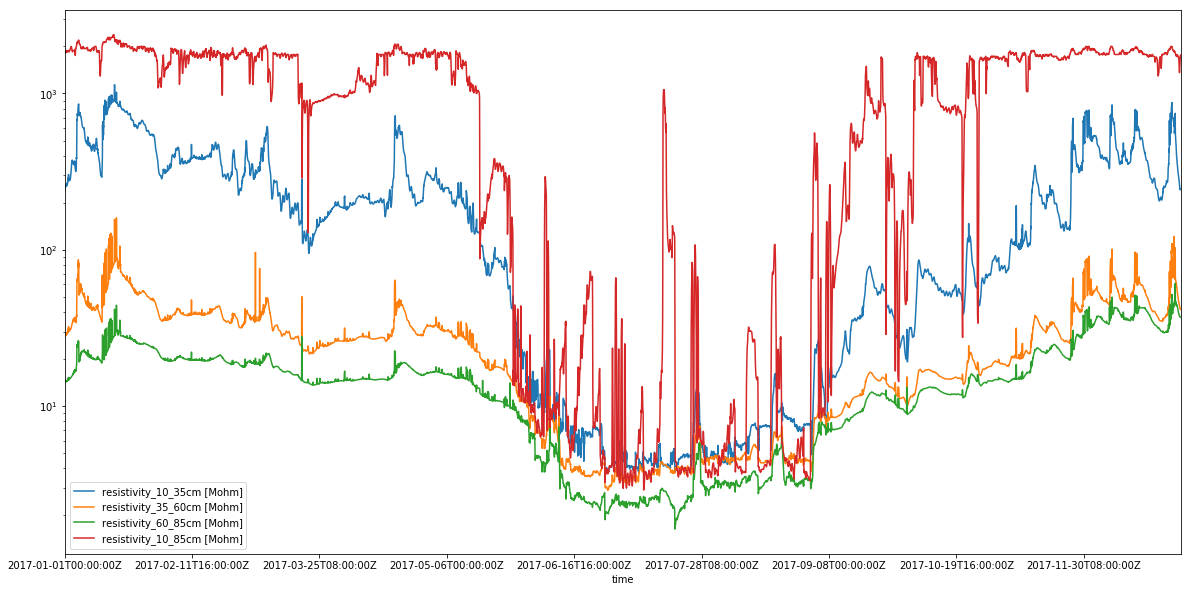

In [279]:
#df.plot('time', ['resistivity_10_35cm [Mohm]', 'resistivity_35_60cm [Mohm]', 'resistivity_60_85cm [Mohm]', 'resistivity_10_85cm [Mohm]'], figsize=(20,10))
#plt.semilogy()

In [280]:
dataset['label_thresh_rest10'] = dataset.loc[:, 'resistivity_10cm [Mohm]'] > 50
dataset['rain_label'] = dataset.loc[:, 'rain_intensity'] > 1

In [282]:
dataset.query('rain_label == False').loc[:, ['path', 'label_thresh_rest10']].to_csv('labels_rain_resist.csv', header=False)
dataset.loc[:, ['path', 'label_thresh_rest10']].to_csv('labels.csv', header=False)

/Users/jim/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:407: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  s = level_values.to_series()
/Users/jim/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:415: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  dindex = axis_index.to_series()


In [283]:
#dataset.head()

,time,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],...,wind_speed_minimum [km/h],wind_speed_average [km/h],wind_speed_maximum [km/h],temp_air [°C],temp_internal [°C],relative_humidity [%RH],air_pressure [hPa],path,label_thresh_rest10,rain_label
time,,,,,,,,,,,,,,,,,,,,,
2017-05-01 08:00:00+00:00,2017-05-01T08:00:00Z,11.0,2096.0,1531.202300,965.89580,140.39210,9.628300,282.796500,32.468400,16.545800,...,0.00,4.973300,28.100000,-9.186200,-4.110000,77.84670,655.755200,NaN,True,False
2017-05-01 08:00:00+00:00,2017-05-01T08:00:00Z,11.0,2096.0,1531.202300,965.89580,140.39210,9.628300,282.796500,32.468400,16.545800,...,0.00,4.973300,28.100000,-9.186200,-4.110000,77.84670,655.755200,NaN,True,False
2017-05-01 08:04:00+00:00,NaN,11.0,2096.0,1531.055767,965.53678,140.38348,9.628313,282.714807,32.463307,16.544047,...,0.04,5.565833,29.493333,-9.269273,-4.193207,77.80638,655.724853,NaN,True,False
2017-05-01 08:08:00+00:00,NaN,11.0,2096.0,1530.909233,965.17776,140.37486,9.628327,282.633113,32.458213,16.542293,...,0.08,6.158367,30.886667,-9.352347,-4.276413,77.76606,655.694507,NaN,True,False
2017-05-01 08:12:00+00:00,NaN,11.0,2096.0,1530.762700,964.81874,140.36624,9.628340,282.551420,32.453120,16.540540,...,0.12,6.750900,32.280000,-9.435420,-4.359620,77.72574,655.664160,NaN,True,False


In [285]:
#pd.crosstab(dataset.loc[:, 'rain_label'], dataset.loc[:, 'label_thresh_rest10'])

label_thresh_rest10,False,True
rain_label,,
False,6984,6246
True,821,155


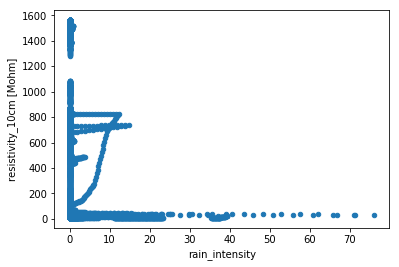

In [287]:
#dataset.plot.scatter('rain_intensity', 'resistivity_10cm [Mohm]')

In [99]:
#len(dataset.iloc[summer_days.index].query('rain_label == False').loc[:, ['path', 'label_thresh_rest10']].query('label_thresh_rest10 == True'))

0